<a href="https://colab.research.google.com/github/DenisDrobyshev/university/blob/master/%2205_2025_%D0%94%D0%B8%D0%B0%D0%B3%D0%BD%D0%BE%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%969_%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D1%81%D0%B8%D0%B3%D0%BD%D0%B0%D0%BB%D0%BE%D0%B2_%D0%B8_%D1%80%D1%8F%D0%B4%D1%8B_%D0%A4%D1%83%D1%80%D1%8C%D0%B5_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Диагностическая работа №9. Генерация сигналов и ряды Фурье**


## **Задание №1. Генерация простого сигнала**

Напишите код для создания синусоидального сигнала с частотой 5 Гц и амплитудой 2. Визуализируйте его для интервала времени 0-2 секунды с частотой дискретизации 100 Гц.


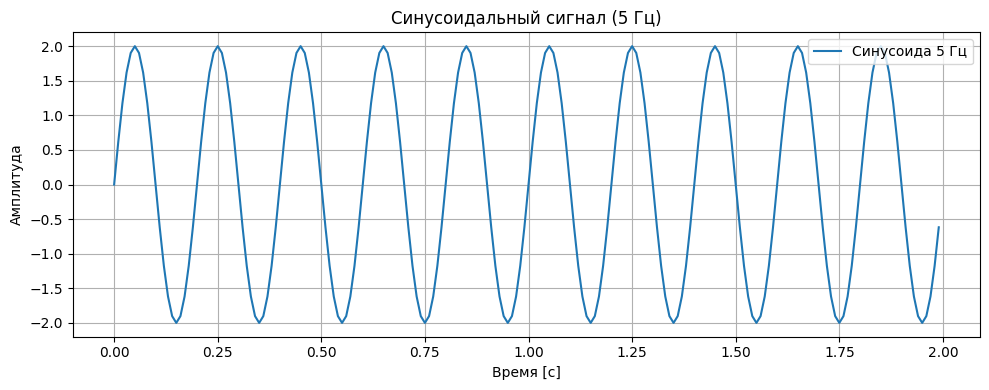

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
freq = 5       # Частота в Гц
amplitude = 2  # Амплитуда
fs = 100       # Частота дискретизации
t = np.arange(0, 2, 1/fs)  # Временные отсчеты (0-2 секунды)

# Синусоидальный сигнал
signal = amplitude * np.sin(2 * np.pi * freq * t)

# Визуализация
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Синусоида 5 Гц')
plt.title('Синусоидальный сигнал (5 Гц)')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## **Задание №2. Комбинирование сигналов**



Создайте и отобразите сигнал, состоящий из суммы синусоиды (3 Гц) и синусоиды (7 Гц) с амплитудами 1 и 0.5 соответственно. Объясните, как амплитуды компонентов влияют на форму результирующего сигнала.

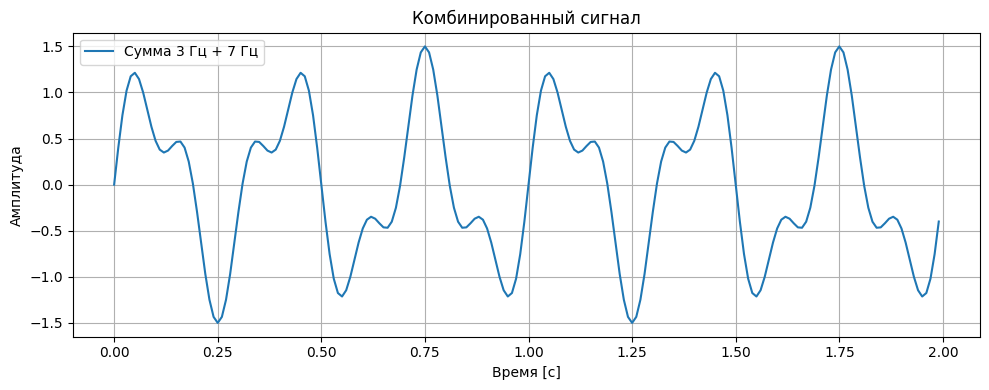

Амплитуды определяют вклад каждой гармоники в результирующий сигнал.
Большая амплитуда у 3 Гц делает её более заметной в суммарной волне.


In [ ]:
# Параметры
freq1 = 3
freq2 = 7
amp1 = 1
amp2 = 0.5

# Генерация составных сигналов
signal1 = amp1 * np.sin(2 * np.pi * freq1 * t)
signal2 = amp2 * np.sin(2 * np.pi * freq2 * t)
combined_signal = signal1 + signal2

# Визуализация
plt.figure(figsize=(10, 4))
plt.plot(t, combined_signal, label='Сумма 3 Гц + 7 Гц')
plt.title('Комбинированный сигнал')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("Амплитуды определяют вклад каждой гармоники в результирующий сигнал.")
print("Большая амплитуда у 3 Гц делает её более заметной в суммарной волне.")

## **Задание №3. Частотный анализ**



Для сигнала, состоящего из синусоид с частотами 5 Гц и 15 Гц, выполните быстрое преобразование Фурье и постройте спектр. Определите, какие пики присутствуют и соответствуют ли они ожидаемым частотам.

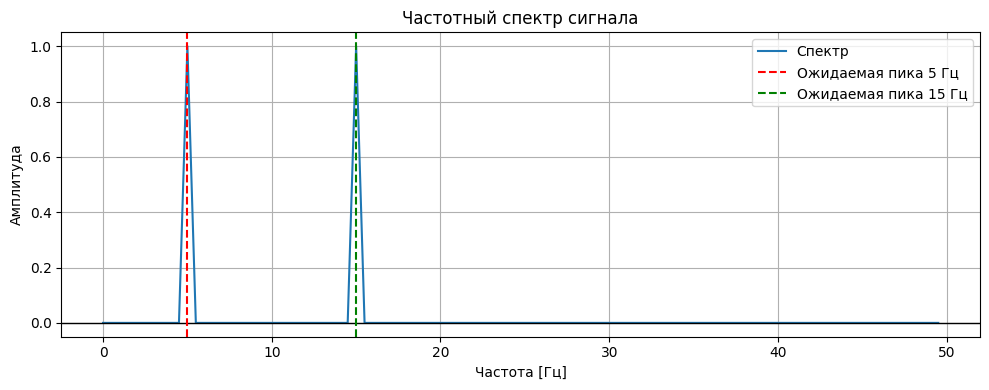

На графике видны пики на 5 Гц и 15 Гц — это соответствует ожиданиям.


In [ ]:
from scipy.fft import fft, fftfreq

# Генерация сигнала из двух частот
signal_fft = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 15 * t)

# Быстрое преобразование Фурье
N = len(signal_fft)
yf = fft(signal_fft)
xf = fftfreq(N, 1/fs)

# Оставляем только положительные частоты
xf = xf[:N//2]
yf = 2.0/N * np.abs(yf[:N//2])

# Визуализация спектра
plt.figure(figsize=(10, 4))
plt.plot(xf, yf, label='Спектр')
plt.title('Частотный спектр сигнала')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.axhline(0, color='black', lw=1)
plt.axvline(5, color='r', linestyle='--', label='Ожидаемая пика 5 Гц')
plt.axvline(15, color='g', linestyle='--', label='Ожидаемая пика 15 Гц')
plt.legend()
plt.tight_layout()
plt.show()

print("На графике видны пики на 5 Гц и 15 Гц — это соответствует ожиданиям.")

## **Задание №4. Фильтрация шума**



Сгенерируйте косинусоидальный сигнал (8 Гц), добавьте к нему случайный шум с амплитудой 0.5. Примените фильтр низких частот для удаления шума и сравните исходный и очищенный сигналы.

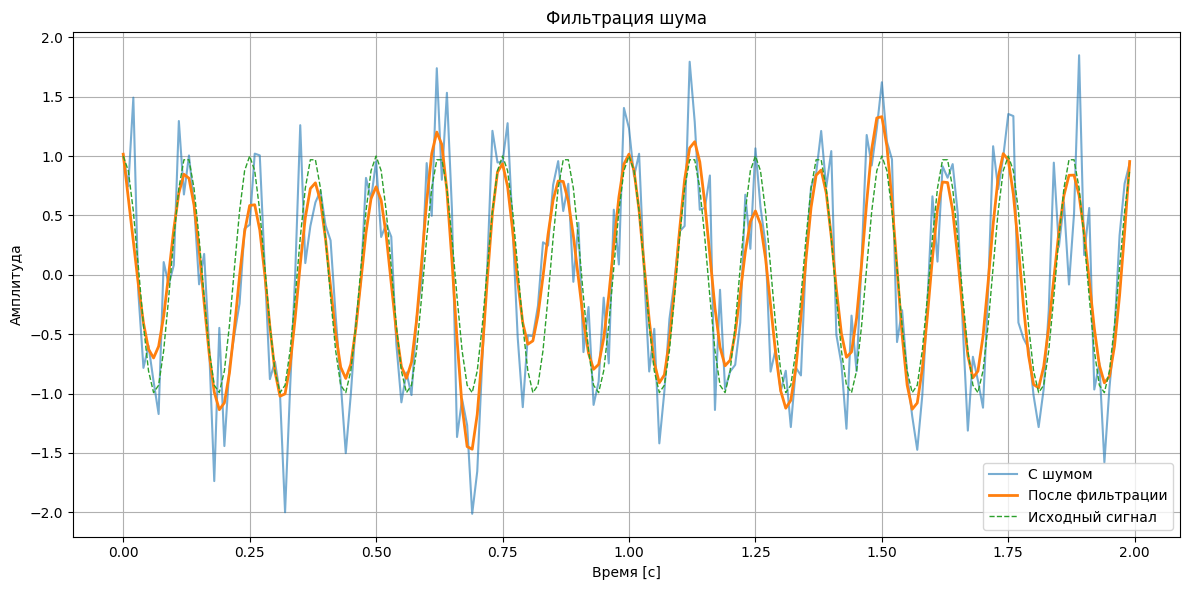

Фильтр низких частот успешно уменьшил уровень шума и приблизил сигнал к исходному.


In [ ]:
from scipy.signal import butter, filtfilt

# Генерация чистого сигнала
clean_signal = np.cos(2 * np.pi * 8 * t)

# Добавление случайного шума
noisy_signal = clean_signal + 0.5 * np.random.randn(len(t))

# ФНЧ фильтр (баттерворта)
def lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Применение фильтрации
filtered_signal = lowpass_filter(noisy_signal, cutoff=10, fs=fs)

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(t, noisy_signal, label='С шумом', alpha=0.6)
plt.plot(t, filtered_signal, label='После фильтрации', linewidth=2)
plt.plot(t, clean_signal, '--', label='Исходный сигнал', linewidth=1)
plt.title('Фильтрация шума')
plt.xlabel('Время [с]')
plt.ylabel('Амплитуда')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("Фильтр низких частот успешно уменьшил уровень шума и приблизил сигнал к исходному.")